# Resampling,Tumbling window,Sliding window,Sliding window with different threshold

In [1]:
import pandas as pd
import numpy as np
from dateutil.parser import parse 
import matplotlib
import matplotlib.pyplot as plt
from numpy.random import randn
from pandas import Series, DataFrame
from pylab import rcParams
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
###
from pandas import read_csv
from pandas import datetime
 

C:\Users\arrah\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from ipykernel import kernelapp as app


In [2]:
df = pd.read_csv(r"C:\Users\arrah\Desktop\Trendminer_Intern\CoffeeML1.csv", parse_dates =["timestamp"])

#df_large = read_csv(r"C:\Users\arrah\Desktop\Trendminer_Intern\CoffeeML1.csv",index_col=0,squeeze=True,parse_dates =["timestamp"])

count_row = df.shape[0]  # gives number of row count
count_column = df.shape[1] # gives number of column count

print('Number of rows: {}'.format(count_row))
print('Number of columns: {}'.format(count_column))

df.head()

Number of rows: 13588472
Number of columns: 11


,timestamp,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,AnalogNoiseSensor.noiseTotal,Keypad.keyPressed
0,2020-07-16 00:00:00.024000+00:00,NaN,NaN,12.0,NaN,17.0,NaN,NaN,NaN,15091.0,NaN
1,2020-07-16 00:00:00.026000+00:00,1548.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN,NaN
2,2020-07-16 00:00:00.134000+00:00,NaN,NaN,3.0,NaN,11.0,NaN,NaN,NaN,14695.0,NaN
3,2020-07-16 00:00:00.135000+00:00,1550.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN,NaN
4,2020-07-16 00:00:00.236000+00:00,NaN,NaN,6.0,NaN,6.0,NaN,NaN,NaN,15082.0,NaN


# Selecting a period of time assume there will people in the office do brew coffee

In [3]:
#data_0 = df1.drop(df1['2020-07-16 00:00:00':'2020-07-16 07:50:00'].index)
df['timestamp'] = pd.to_datetime(df['timestamp'])
startDate=['2020-07-16 05:00:00','2020-07-17 05:00:00','2020-07-18 05:00:00','2020-07-19 05:00:00','2020-07-20 05:00:00','2020-07-21 05:00:00','2020-07-22 05:00:00']
endDate=['2020-07-16 17:00:00','2020-07-17 17:00:00','2020-07-18 17:00:00','2020-07-19 17:00:00','2020-07-20 17:00:00','2020-07-21 17:00:00','2020-07-22 17:00:00']
#data_0[data_0.timestamp<endDate & startDate]
#df[df['timestamp']>= startDate & df ['timestamp']<= endDate]
result = []
for i in  range(0, len(startDate)) :
    start = startDate[i]
    end = endDate[i]
    result.append((df['timestamp'] > start) & (df['timestamp'] <= end)) 

resultDf = []
for item in result:
    if len(item)>0:
        resultDf.append(df.loc[item])

merged_df = pd.concat(resultDf)
merged_df

,timestamp,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,AnalogNoiseSensor.noiseTotal,Keypad.keyPressed
404347,2020-07-16 05:00:00.004000+00:00,NaN,NaN,3.0,NaN,11.0,NaN,NaN,NaN,12323.0,NaN
404348,2020-07-16 05:00:00.005000+00:00,1545.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN,NaN
404349,2020-07-16 05:00:00.115000+00:00,NaN,NaN,7.0,NaN,11.0,NaN,NaN,NaN,13651.0,NaN
404350,2020-07-16 05:00:00.116000+00:00,1556.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN,NaN
404351,2020-07-16 05:00:00.216000+00:00,NaN,NaN,4.0,NaN,9.0,NaN,NaN,NaN,14924.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13021748,2020-07-22 16:59:59.772000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
13021749,2020-07-22 16:59:59.872000+00:00,NaN,NaN,1.0,NaN,9.0,NaN,NaN,NaN,14843.0,NaN
13021750,2020-07-22 16:59:59.880000+00:00,1556.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN,NaN
13021751,2020-07-22 16:59:59.991000+00:00,NaN,NaN,18.0,NaN,19.0,NaN,NaN,NaN,14696.0,NaN


# Setting the timestamp variable as an index

In [4]:
df2= merged_df.set_index('timestamp')
df2

,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,AnalogNoiseSensor.noiseTotal,Keypad.keyPressed
timestamp,,,,,,,,,,
2020-07-16 05:00:00.004000+00:00,NaN,NaN,3.0,NaN,11.0,NaN,NaN,NaN,12323.0,NaN
2020-07-16 05:00:00.005000+00:00,1545.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN,NaN
2020-07-16 05:00:00.115000+00:00,NaN,NaN,7.0,NaN,11.0,NaN,NaN,NaN,13651.0,NaN
2020-07-16 05:00:00.116000+00:00,1556.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN,NaN
2020-07-16 05:00:00.216000+00:00,NaN,NaN,4.0,NaN,9.0,NaN,NaN,NaN,14924.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-07-22 16:59:59.772000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2020-07-22 16:59:59.872000+00:00,NaN,NaN,1.0,NaN,9.0,NaN,NaN,NaN,14843.0,NaN
2020-07-22 16:59:59.880000+00:00,1556.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN,NaN


In [5]:
df2.index

DatetimeIndex(['2020-07-16 05:00:00.004000+00:00',
               '2020-07-16 05:00:00.005000+00:00',
               '2020-07-16 05:00:00.115000+00:00',
               '2020-07-16 05:00:00.116000+00:00',
               '2020-07-16 05:00:00.216000+00:00',
               '2020-07-16 05:00:00.224000+00:00',
               '2020-07-16 05:00:00.334000+00:00',
               '2020-07-16 05:00:00.335000+00:00',
               '2020-07-16 05:00:00.436000+00:00',
               '2020-07-16 05:00:00.445000+00:00',
               ...
               '2020-07-22 16:59:59.550000+00:00',
               '2020-07-22 16:59:59.551000+00:00',
               '2020-07-22 16:59:59.660000+00:00',
               '2020-07-22 16:59:59.661000+00:00',
               '2020-07-22 16:59:59.771000+00:00',
               '2020-07-22 16:59:59.772000+00:00',
               '2020-07-22 16:59:59.872000+00:00',
               '2020-07-22 16:59:59.880000+00:00',
               '2020-07-22 16:59:59.991000+00:00',
            

In [ ]:
# rdf = pd.date_range(start, end, freq='100ms')
# rdf

In [6]:
df_1 = pd.DataFrame(merged_df)
df_1

,timestamp,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,AnalogNoiseSensor.noiseTotal,Keypad.keyPressed
404347,2020-07-16 05:00:00.004000+00:00,NaN,NaN,3.0,NaN,11.0,NaN,NaN,NaN,12323.0,NaN
404348,2020-07-16 05:00:00.005000+00:00,1545.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN,NaN
404349,2020-07-16 05:00:00.115000+00:00,NaN,NaN,7.0,NaN,11.0,NaN,NaN,NaN,13651.0,NaN
404350,2020-07-16 05:00:00.116000+00:00,1556.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN,NaN
404351,2020-07-16 05:00:00.216000+00:00,NaN,NaN,4.0,NaN,9.0,NaN,NaN,NaN,14924.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13021748,2020-07-22 16:59:59.772000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
13021749,2020-07-22 16:59:59.872000+00:00,NaN,NaN,1.0,NaN,9.0,NaN,NaN,NaN,14843.0,NaN
13021750,2020-07-22 16:59:59.880000+00:00,1556.0,NaN,NaN,NaN,NaN,0.0,2.0,1.0,NaN,NaN
13021751,2020-07-22 16:59:59.991000+00:00,NaN,NaN,18.0,NaN,19.0,NaN,NaN,NaN,14696.0,NaN


In [ ]:
# start, end = '2020-07-16 5:00:00', '2020-07-22 17:00:00' 
# df_3 = df_1['timestamp'] = pd.date_range(start,end, freq='ms')
# df_3

# Resampling the dataset by 100ms

In [7]:
df3=df2.resample('100ms',level=0).mean()
df3

,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,AnalogNoiseSensor.noiseTotal,Keypad.keyPressed
timestamp,,,,,,,,,,
2020-07-16 05:00:00+00:00,1545.0,NaN,3.0,NaN,11.0,0.0,2.0,1.0,12323.0,NaN
2020-07-16 05:00:00.100000+00:00,1556.0,NaN,7.0,NaN,11.0,0.0,2.0,1.0,13651.0,NaN
2020-07-16 05:00:00.200000+00:00,1550.0,NaN,4.0,NaN,9.0,0.0,2.0,1.0,14924.0,NaN
2020-07-16 05:00:00.300000+00:00,1551.0,NaN,3.0,NaN,10.0,0.0,2.0,1.0,14119.0,NaN
2020-07-16 05:00:00.400000+00:00,1543.0,41.9375,8.0,29.34375,9.0,0.0,2.0,1.0,14174.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-07-22 16:59:59.500000+00:00,1569.0,NaN,8.0,NaN,13.0,0.0,2.0,1.0,14387.0,NaN
2020-07-22 16:59:59.600000+00:00,1554.0,NaN,10.0,NaN,10.0,0.0,2.0,1.0,16016.0,NaN
2020-07-22 16:59:59.700000+00:00,1579.0,NaN,31.0,NaN,31.0,0.0,1.0,1.0,14959.0,NaN


# Splitting the dataset into two parts of Independent and Dependent variable

In [8]:
X, y = df3.drop(['Keypad.keyPressed'], axis=1), df3['Keypad.keyPressed']
X

,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,AnalogNoiseSensor.noiseTotal
timestamp,,,,,,,,,
2020-07-16 05:00:00+00:00,1545.0,NaN,3.0,NaN,11.0,0.0,2.0,1.0,12323.0
2020-07-16 05:00:00.100000+00:00,1556.0,NaN,7.0,NaN,11.0,0.0,2.0,1.0,13651.0
2020-07-16 05:00:00.200000+00:00,1550.0,NaN,4.0,NaN,9.0,0.0,2.0,1.0,14924.0
2020-07-16 05:00:00.300000+00:00,1551.0,NaN,3.0,NaN,10.0,0.0,2.0,1.0,14119.0
2020-07-16 05:00:00.400000+00:00,1543.0,41.9375,8.0,29.34375,9.0,0.0,2.0,1.0,14174.0
...,...,...,...,...,...,...,...,...,...
2020-07-22 16:59:59.500000+00:00,1569.0,NaN,8.0,NaN,13.0,0.0,2.0,1.0,14387.0
2020-07-22 16:59:59.600000+00:00,1554.0,NaN,10.0,NaN,10.0,0.0,2.0,1.0,16016.0
2020-07-22 16:59:59.700000+00:00,1579.0,NaN,31.0,NaN,31.0,0.0,1.0,1.0,14959.0


# Interpolating the independent variables

In [9]:
X1 = X.interpolate(method='linear', axis=0).ffill().bfill()
X1

,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,AnalogNoiseSensor.noiseTotal
timestamp,,,,,,,,,
2020-07-16 05:00:00+00:00,1545.0,41.9375,3.0,29.34375,11.0,0.0,2.0,1.0,12323.0
2020-07-16 05:00:00.100000+00:00,1556.0,41.9375,7.0,29.34375,11.0,0.0,2.0,1.0,13651.0
2020-07-16 05:00:00.200000+00:00,1550.0,41.9375,4.0,29.34375,9.0,0.0,2.0,1.0,14924.0
2020-07-16 05:00:00.300000+00:00,1551.0,41.9375,3.0,29.34375,10.0,0.0,2.0,1.0,14119.0
2020-07-16 05:00:00.400000+00:00,1543.0,41.9375,8.0,29.34375,9.0,0.0,2.0,1.0,14174.0
...,...,...,...,...,...,...,...,...,...
2020-07-22 16:59:59.500000+00:00,1569.0,36.8750,8.0,30.12500,13.0,0.0,2.0,1.0,14387.0
2020-07-22 16:59:59.600000+00:00,1554.0,36.8750,10.0,30.12500,10.0,0.0,2.0,1.0,16016.0
2020-07-22 16:59:59.700000+00:00,1579.0,36.8750,31.0,30.12500,31.0,0.0,1.0,1.0,14959.0


# Merging the split dataset after interpolation

In [10]:
merged_df1 = pd.concat([X1, y], axis=1)
merged_df1

,AnalogVibrationSensor.vibrationTotal,TemperatureAndHumiditySensor.humidity,AnalogNoiseSensor.noiseDiff,TemperatureAndHumiditySensor.temperature,AnalogNoiseSensor.noiseRange,AnalogVibrationSensor.vibrationDiff,AnalogVibrationSensor.vibrationRange,VibrationThresholdSensor.vibrationThreshold,AnalogNoiseSensor.noiseTotal,Keypad.keyPressed
timestamp,,,,,,,,,,
2020-07-16 05:00:00+00:00,1545.0,41.9375,3.0,29.34375,11.0,0.0,2.0,1.0,12323.0,NaN
2020-07-16 05:00:00.100000+00:00,1556.0,41.9375,7.0,29.34375,11.0,0.0,2.0,1.0,13651.0,NaN
2020-07-16 05:00:00.200000+00:00,1550.0,41.9375,4.0,29.34375,9.0,0.0,2.0,1.0,14924.0,NaN
2020-07-16 05:00:00.300000+00:00,1551.0,41.9375,3.0,29.34375,10.0,0.0,2.0,1.0,14119.0,NaN
2020-07-16 05:00:00.400000+00:00,1543.0,41.9375,8.0,29.34375,9.0,0.0,2.0,1.0,14174.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-07-22 16:59:59.500000+00:00,1569.0,36.8750,8.0,30.12500,13.0,0.0,2.0,1.0,14387.0,NaN
2020-07-22 16:59:59.600000+00:00,1554.0,36.8750,10.0,30.12500,10.0,0.0,2.0,1.0,16016.0,NaN
2020-07-22 16:59:59.700000+00:00,1579.0,36.8750,31.0,30.12500,31.0,0.0,1.0,1.0,14959.0,NaN


In [11]:
merged_df1.isnull().sum() 

AnalogVibrationSensor.vibrationTotal                 0
TemperatureAndHumiditySensor.humidity                0
AnalogNoiseSensor.noiseDiff                          0
TemperatureAndHumiditySensor.temperature             0
AnalogNoiseSensor.noiseRange                         0
AnalogVibrationSensor.vibrationDiff                  0
AnalogVibrationSensor.vibrationRange                 0
VibrationThresholdSensor.vibrationThreshold          0
AnalogNoiseSensor.noiseTotal                         0
Keypad.keyPressed                              5614721
dtype: int64

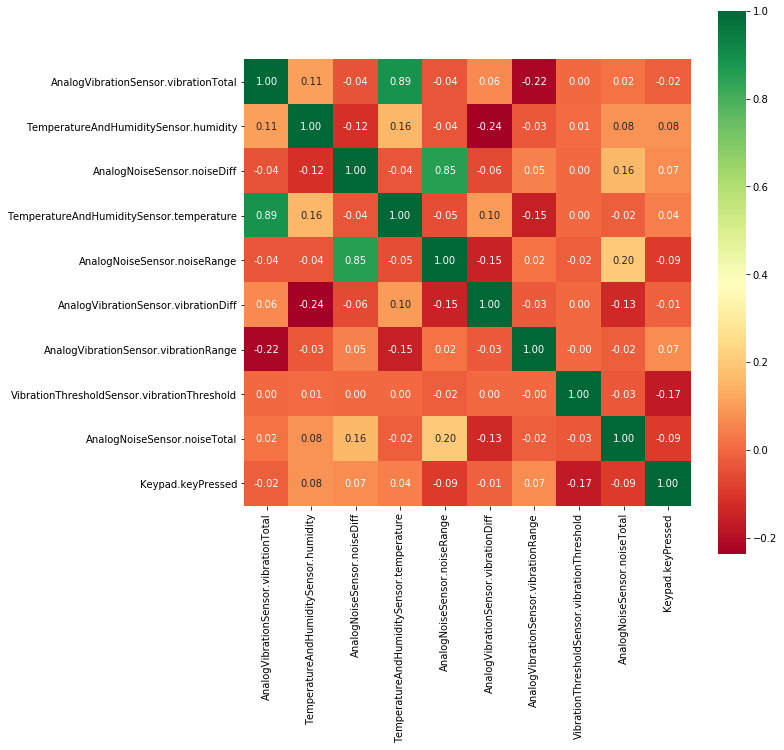

In [12]:
plt.figure(figsize=(10,10))
p=sns.heatmap(merged_df1.corr(), annot=True,cmap='RdYlGn',square=True, fmt='.2f')

# Selecting the Analognoise.noisetotal from the dataframe

In [27]:
df_2 = merged_df1[['AnalogNoiseSensor.noiseTotal']]
df_2

,AnalogNoiseSensor.noiseTotal
timestamp,
2020-07-16 05:00:00+00:00,12323.0
2020-07-16 05:00:00.100000+00:00,13651.0
2020-07-16 05:00:00.200000+00:00,14924.0
2020-07-16 05:00:00.300000+00:00,14119.0
2020-07-16 05:00:00.400000+00:00,14174.0
...,...
2020-07-22 16:59:59.500000+00:00,14387.0
2020-07-22 16:59:59.600000+00:00,16016.0
2020-07-22 16:59:59.700000+00:00,14959.0


In [57]:
#g = df_2.to_csv(r"C:\Users\arrah\Desktop\Trendminer_Intern\transposse_20_seconds.csv", index = False)

In [28]:
df_2.count

<bound method DataFrame.count of                                   AnalogNoiseSensor.noiseTotal
timestamp                                                     
2020-07-16 05:00:00+00:00                              12323.0
2020-07-16 05:00:00.100000+00:00                       13651.0
2020-07-16 05:00:00.200000+00:00                       14924.0
2020-07-16 05:00:00.300000+00:00                       14119.0
2020-07-16 05:00:00.400000+00:00                       14174.0
...                                                        ...
2020-07-22 16:59:59.500000+00:00                       14387.0
2020-07-22 16:59:59.600000+00:00                       16016.0
2020-07-22 16:59:59.700000+00:00                       14959.0
2020-07-22 16:59:59.800000+00:00                       14843.0
2020-07-22 16:59:59.900000+00:00                       14696.0

[5616000 rows x 1 columns]>

# Applying the Tumbling window approach

In [29]:
partitions = df_2.count()//200
rest =df_2.count()['AnalogNoiseSensor.noiseTotal']%200
q = partitions["AnalogNoiseSensor.noiseTotal"] * 200
partitions["AnalogNoiseSensor.noiseTotal"]

28080

In [30]:
q

5616000

In [31]:
rest

0

In [32]:
dfs = np.array_split(df_2, partitions["AnalogNoiseSensor.noiseTotal"])
if rest>0:
    dfr = df_2.loc[q:q+rest]
    dfs.append(dfr)

dfs 

[                                  AnalogNoiseSensor.noiseTotal
 timestamp                                                     
 2020-07-16 05:00:00+00:00                              12323.0
 2020-07-16 05:00:00.100000+00:00                       13651.0
 2020-07-16 05:00:00.200000+00:00                       14924.0
 2020-07-16 05:00:00.300000+00:00                       14119.0
 2020-07-16 05:00:00.400000+00:00                       14174.0
 ...                                                        ...
 2020-07-16 05:00:19.500000+00:00                       14371.0
 2020-07-16 05:00:19.600000+00:00                       14897.0
 2020-07-16 05:00:19.700000+00:00                       13949.0
 2020-07-16 05:00:19.800000+00:00                       14808.0
 2020-07-16 05:00:19.900000+00:00                       14476.0
 
 [200 rows x 1 columns],
                                   AnalogNoiseSensor.noiseTotal
 timestamp                                                     
 2020-07-16 0

In [ ]:
#dfs = np.array_split(merged_df3, partitions["AnalogNoiseSensor.noiseTotal"])
#dfs

In [21]:
dfs[0].count()

AnalogNoiseSensor.noiseTotal    200
dtype: int64

In [22]:
type(dfs)

list

In [24]:
dfs_1 = dfs[0].transpose()
dfs_1

timestamp,2020-07-16 05:00:00+00:00,2020-07-16 05:00:00.100000+00:00,2020-07-16 05:00:00.200000+00:00,2020-07-16 05:00:00.300000+00:00,2020-07-16 05:00:00.400000+00:00,2020-07-16 05:00:00.500000+00:00,2020-07-16 05:00:00.600000+00:00,2020-07-16 05:00:00.700000+00:00,2020-07-16 05:00:00.800000+00:00,2020-07-16 05:00:00.900000+00:00,...,2020-07-16 05:00:19+00:00,2020-07-16 05:00:19.100000+00:00,2020-07-16 05:00:19.200000+00:00,2020-07-16 05:00:19.300000+00:00,2020-07-16 05:00:19.400000+00:00,2020-07-16 05:00:19.500000+00:00,2020-07-16 05:00:19.600000+00:00,2020-07-16 05:00:19.700000+00:00,2020-07-16 05:00:19.800000+00:00,2020-07-16 05:00:19.900000+00:00
AnalogNoiseSensor.noiseTotal,12323.0,13651.0,14924.0,14119.0,14174.0,13970.0,12905.0,13619.0,15981.0,13069.0,...,14329.0,15134.0,13969.0,13760.0,14065.5,14371.0,14897.0,13949.0,14808.0,14476.0


In [41]:
#g = rsf.to_csv(r"C:\Users\arrah\Desktop\Trendminer_Intern\transpose_20_seconds.csv", index = False)

In [33]:
df_tr = df_2.transpose()
df_tr

timestamp,2020-07-16 05:00:00+00:00,2020-07-16 05:00:00.100000+00:00,2020-07-16 05:00:00.200000+00:00,2020-07-16 05:00:00.300000+00:00,2020-07-16 05:00:00.400000+00:00,2020-07-16 05:00:00.500000+00:00,2020-07-16 05:00:00.600000+00:00,2020-07-16 05:00:00.700000+00:00,2020-07-16 05:00:00.800000+00:00,2020-07-16 05:00:00.900000+00:00,...,2020-07-22 16:59:59+00:00,2020-07-22 16:59:59.100000+00:00,2020-07-22 16:59:59.200000+00:00,2020-07-22 16:59:59.300000+00:00,2020-07-22 16:59:59.400000+00:00,2020-07-22 16:59:59.500000+00:00,2020-07-22 16:59:59.600000+00:00,2020-07-22 16:59:59.700000+00:00,2020-07-22 16:59:59.800000+00:00,2020-07-22 16:59:59.900000+00:00
AnalogNoiseSensor.noiseTotal,12323.0,13651.0,14924.0,14119.0,14174.0,13970.0,12905.0,13619.0,15981.0,13069.0,...,15283.5,16734.0,14198.0,13371.0,14225.0,14387.0,16016.0,14959.0,14843.0,14696.0


In [34]:
df_3 = merged_df1.loc[: , "AnalogNoiseSensor.noiseTotal"]
df_3

timestamp
2020-07-16 05:00:00+00:00           12323.0
2020-07-16 05:00:00.100000+00:00    13651.0
2020-07-16 05:00:00.200000+00:00    14924.0
2020-07-16 05:00:00.300000+00:00    14119.0
2020-07-16 05:00:00.400000+00:00    14174.0
                                     ...   
2020-07-22 16:59:59.500000+00:00    14387.0
2020-07-22 16:59:59.600000+00:00    16016.0
2020-07-22 16:59:59.700000+00:00    14959.0
2020-07-22 16:59:59.800000+00:00    14843.0
2020-07-22 16:59:59.900000+00:00    14696.0
Freq: 100L, Name: AnalogNoiseSensor.noiseTotal, Length: 5616000, dtype: float64

In [35]:
type(df_3)

pandas.core.series.Series

In [36]:
tsf=df_3.to_frame()
tsf

,AnalogNoiseSensor.noiseTotal
timestamp,
2020-07-16 05:00:00+00:00,12323.0
2020-07-16 05:00:00.100000+00:00,13651.0
2020-07-16 05:00:00.200000+00:00,14924.0
2020-07-16 05:00:00.300000+00:00,14119.0
2020-07-16 05:00:00.400000+00:00,14174.0
...,...
2020-07-22 16:59:59.500000+00:00,14387.0
2020-07-22 16:59:59.600000+00:00,16016.0
2020-07-22 16:59:59.700000+00:00,14959.0


In [ ]:
g = tsf.to_csv(r"C:\Users\arrah\Desktop\Trendminer_Intern\tsf_extract.csv", index = False)

In [ ]:
# df46 = tsf[(tsf['AnalogNoiseSensor.noiseTotal']>15000)]
# df46

In [53]:
#g = df46.to_csv(r"C:\Users\arrah\Desktop\Trendminer_Intern\extract_15000.csv", index = False)

In [ ]:
# df47 = pd.read_csv(r"C:\Users\arrah\Desktop\Trendminer_Intern\extract_15000.csv")
# df47

In [2]:
df10 = pd.read_csv(r"C:\Users\arrah\Desktop\Trendminer_Intern\tsf_extract.csv")
df10

,AnalogNoiseSensor.noiseTotal
0,12323.0
1,13651.0
2,14924.0
3,14119.0
4,14174.0
...,...
5615995,14387.0
5615996,16016.0
5615997,14959.0
5615998,14843.0


In [3]:
df11 = df10.values
df11

array([[12323.],
       [13651.],
       [14924.],
       ...,
       [14959.],
       [14843.],
       [14696.]])

In [4]:
df11.shape

(5616000, 1)

In [224]:
df12 = np.split(df11,60)
df12

[array([[12323.],
        [13651.],
        [14924.],
        ...,
        [13410.],
        [13771.],
        [14132.]]),
 array([[14226.],
        [13612.],
        [14771.],
        ...,
        [14911.],
        [13694.],
        [14847.]]),
 array([[15684.5],
        [16522. ],
        [15317. ],
        ...,
        [13485. ],
        [13152. ],
        [13952. ]]),
 array([[14869.],
        [15946.],
        [14180.],
        ...,
        [15424.],
        [14491.],
        [14295.]]),
 array([[12546.        ],
        [16948.        ],
        [14078.        ],
        ...,
        [13661.74497976],
        [13661.74738947],
        [13661.74979919]]),
 array([[13661.75220891],
        [13661.75461862],
        [13661.75702834],
        ...,
        [13887.29445765],
        [13887.29686737],
        [13887.29927709]]),
 array([[13887.3016868 ],
        [13887.30409652],
        [13887.30650623],
        ...,
        [14112.84393555],
        [14112.84634526],
        [14112.84

In [225]:
type(df12)

list

In [226]:
#converting a list to an array
my_array = np.array(df12)
my_array

array([[[12323. ],
        [13651. ],
        [14924. ],
        ...,
        [13410. ],
        [13771. ],
        [14132. ]],

       [[14226. ],
        [13612. ],
        [14771. ],
        ...,
        [14911. ],
        [13694. ],
        [14847. ]],

       [[15684.5],
        [16522. ],
        [15317. ],
        ...,
        [13485. ],
        [13152. ],
        [13952. ]],

       ...,

       [[14471. ],
        [13821. ],
        [13828. ],
        ...,
        [15280. ],
        [14821. ],
        [13642. ]],

       [[15703. ],
        [12992. ],
        [15911. ],
        ...,
        [15674. ],
        [15424. ],
        [13965. ]],

       [[15277. ],
        [13651. ],
        [14866. ],
        ...,
        [14959. ],
        [14843. ],
        [14696. ]]])

In [ ]:
# import numpy as np
# my_array
# filter_arr = my_array> 15000

# newarr = my_array[filter_arr]

# #print(filter_arr)
# print(newarr)

In [227]:
type(my_array)
print(my_array.shape)

(60, 93600, 1)


In [228]:
df13 = np.transpose(df12)
df13

array([[[12323. , 14226. , 15684.5, ..., 14471. , 15703. , 15277. ],
        [13651. , 13612. , 16522. , ..., 13821. , 12992. , 13651. ],
        [14924. , 14771. , 15317. , ..., 13828. , 15911. , 14866. ],
        ...,
        [13410. , 14911. , 13485. , ..., 15280. , 15674. , 14959. ],
        [13771. , 13694. , 13152. , ..., 14821. , 15424. , 14843. ],
        [14132. , 14847. , 13952. , ..., 13642. , 13965. , 14696. ]]])

In [229]:
df14 =pd.DataFrame(df13[0])
df14

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,12323.0,14226.0,15684.5,14869.0,12546.000000,13661.752209,13887.301687,14112.851165,14338.400643,14563.950120,...,13996.000000,13995.003167,14307.002444,14619.001722,14931.001000,15243.000278,13683.0,14471.0,15703.0,15277.0
1,13651.0,13612.0,16522.0,15946.0,16948.000000,13661.754619,13887.304097,14112.853574,14338.403052,14563.952530,...,14010.000000,13995.006500,14307.005778,14619.005056,14931.004333,15243.003611,14881.0,13821.0,12992.0,13651.0
2,14924.0,14771.0,15317.0,14180.0,14078.000000,13661.757028,13887.306506,14112.855984,14338.405462,14563.954940,...,15558.000000,13995.009833,14307.009111,14619.008389,14931.007667,15243.006944,14403.0,13828.0,15911.0,14866.0
3,14119.0,14395.0,14504.0,14272.0,14136.500000,13661.759438,13887.308916,14112.858394,14338.407872,14563.957350,...,13734.000000,13995.013167,14307.012444,14619.011722,14931.011000,15243.010278,13925.0,13770.0,15087.0,13935.0
4,14174.0,14760.0,14112.0,14533.0,14195.000000,13661.761848,13887.311326,14112.860804,14338.410281,14563.959759,...,15100.000000,13995.016500,14307.015778,14619.015056,14931.014333,15243.013611,16035.0,14076.0,14263.0,13504.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93595,15393.0,15428.0,14236.0,14574.0,13661.740160,13887.289638,14112.839116,14338.388594,14563.938072,14811.000000,...,13994.986500,14306.985778,14618.985056,14930.984333,15242.983611,14001.000000,15227.0,11968.0,13706.0,14387.0
93596,16408.0,14734.0,15309.0,15689.0,13661.742570,13887.292048,14112.841526,14338.391004,14563.940482,14729.500000,...,13994.989833,14306.989111,14618.988389,14930.987667,15242.986944,14292.000000,14394.0,13568.0,15924.0,16016.0
93597,13410.0,14911.0,13485.0,15424.0,13661.744980,13887.294458,14112.843936,14338.393413,14563.942891,14648.000000,...,13994.993167,14306.992444,14618.991722,14930.991000,15242.990278,13234.000000,14252.0,15280.0,15674.0,14959.0
93598,13771.0,13694.0,13152.0,14491.0,13661.747389,13887.296867,14112.846345,14338.395823,14563.945301,14769.000000,...,13994.996500,14306.995778,14618.995056,14930.994333,15242.993611,15096.000000,15356.0,14821.0,15424.0,14843.0


In [230]:
df13.shape

(1, 93600, 60)

In [14]:
#g = df14.to_csv(r"C:\Users\arrah\Desktop\Trendminer_Intern\transpose_final_50_seconds.csv", index = False)

# Sliding window

In [118]:
partial_df = df10

In [236]:
def generate_sample(k, sample_list):
    result = []
    for i in range(len(sample_list)):
        if i <= len(sample_list) - k:
            result.append(sample_list[i : i+k])
    temp = np.array(result)
    final_result = np.reshape(temp, (k, len(sample_list)-k+1, 1))
    return final_result


data_matrix = partial_df.values

sampled_matrix_of_k = generate_sample(50, data_matrix)


# car = lambda l: l[0]
# cdr = lambda l: l[1:]

# def remove_dup(sample_list):
#     if not sample_list:
#         return []
#     else:
#         if car(sample_list) not in cdr(sample_list):
#             return [car(sample_list)] + remove_dup(cdr(sample_list))
#         else:
#             return remove_dup(cdr(sample_list))
        


In [244]:
test = np.transpose(sampled_matrix_of_k)
test

test_df = pd.DataFrame(testt[0])

test_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,12323.0,14877.0,14381.0,15843.000000,13616.642313,13887.301687,14157.961060,14428.620434,14062.0,15850.0,...,15241.0,13990.0,13397.000000,14182.202733,14556.601867,14931.001000,15305.400133,13805.0,13592.0,14216.0
1,13651.0,15222.0,15005.0,15088.000000,13616.644723,13887.304097,14157.963470,14428.622843,13324.0,15420.0,...,14186.0,16005.0,15118.000000,14182.206067,14556.605200,14931.004333,15305.403467,11977.0,14267.0,13859.0
2,14924.0,13558.0,13526.0,14756.000000,13616.647133,13887.306506,14157.965880,14428.625253,12737.0,15900.0,...,14932.0,15733.0,15988.000000,14182.209400,14556.608533,14931.007667,15305.406800,13902.0,14213.0,14411.0
3,14119.0,13956.0,14397.0,14725.000000,13616.649542,13887.308916,14157.968289,14428.627663,13705.0,16380.0,...,13925.0,14755.5,15194.000000,14182.212733,14556.611867,14931.011000,15305.410133,14874.0,14387.0,14532.0
4,14174.0,14693.0,14688.0,14842.000000,13616.651952,13887.311326,14157.970699,14428.630073,14673.0,14694.0,...,13711.0,13778.0,14967.500000,14182.216067,14556.615200,14931.014333,15305.250134,13286.0,14127.0,15175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615946,14839.0,13507.0,14665.0,13616.748341,13887.289638,14157.949012,14428.608385,13818.000000,14846.0,13980.0,...,16508.0,13640.0,14182.186067,14556.585200,14930.984333,15305.383467,15645.000000,14779.0,13714.0,14387.0
5615947,14884.0,14382.0,16010.0,13616.632674,13887.292048,14157.951421,14428.610795,13558.000000,13302.0,14600.0,...,13282.0,13896.0,14182.189400,14556.588533,14930.987667,15305.386800,14716.000000,13978.0,14521.0,16016.0
5615948,14293.0,14812.0,12522.0,13616.635084,13887.294458,14157.953831,14428.613205,13985.000000,14215.0,15220.0,...,14015.0,14846.0,14182.192733,14556.591867,14930.991000,15305.390133,14037.000000,14262.0,14274.0,14959.0
5615949,13685.0,15586.0,13145.5,13616.637494,13887.296867,14157.956241,14428.615614,13442.000000,14361.0,13851.0,...,14770.0,14326.0,14182.196067,14556.595200,14930.994333,15305.393467,14343.000000,14225.0,16814.0,14843.0


# Slidind window with specified threshold


In [246]:
def it_count_of_element(aList, target):
    count = 0
    for i in range(len(aList)):
        if aList[i] > target:
            count += 1
    return count
        
        
def it_selectable_cell(aList, target_value, cut_off_pt):
    if it_count_of_element(aList, target_value) >= cut_off_pt:
        return aList
    

def it_valid_data_set(matrix_data, target_value, cut_off_pt):
    result = []
    for cell in matrix_data:
        if it_selectable_cell(cell, target_value, cut_off_pt):
            result.append(cell)
    return result
        
#print(data_with_valid_cells(df13[0], 15000, 100)


data_set = df13[0].tolist()

print(len(data_set))

result = it_valid_data_set(matrix_data=data_set, target_value=15000, cut_off_pt=25)

print(len(result))
 


93600
480


In [247]:
myarray = np.array(result)
myarray

array([[13490. , 14532. , 14792. , ..., 15704. , 15162. , 15346.5],
       [13414. , 15071. , 15843. , ..., 13873. , 16392. , 14117. ],
       [16137. , 13949. , 13670. , ..., 14895. , 12511. , 15114. ],
       ...,
       [13256.5, 15216. , 15057. , ..., 15409. , 19329. , 13601. ],
       [15423. , 15356. , 13402. , ..., 15594. , 15580. , 13767. ],
       [16392. , 14643. , 15893. , ..., 15099. , 16550. , 14499. ]])

In [248]:
myarray.shape

(480, 60)

In [249]:
myarray1=pd.DataFrame(myarray)
myarray1

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,13490.0,14532.0,14792.0,16339.0,16041.000000,13662.236562,13887.786040,14113.335518,14338.884996,14564.434474,...,15182.000000,13995.673165,14307.672443,14619.671721,14931.670998,15243.670276,16002.0,15704.0,15162.0,15346.5
1,13414.0,15071.0,15843.0,14100.0,15571.000000,13663.157074,13888.706552,14114.256029,14339.805507,14565.354985,...,14497.000000,13996.946495,14308.945773,14620.945051,14932.944329,15244.943607,15074.0,13873.0,16392.0,14117.0
2,16137.0,13949.0,13670.0,14107.0,15022.000000,13663.711309,13889.260786,14114.810264,14340.359742,14565.909220,...,15792.000000,13997.713160,14309.712438,14621.711716,14933.710994,15245.710272,13684.0,14895.0,12511.0,15114.0
3,15067.0,15196.0,13717.0,16003.0,15207.000000,13665.533054,13891.082532,14116.632010,14342.181488,14567.730966,...,12278.000000,14000.233155,14312.232432,14624.231710,14936.230988,15248.230266,15382.0,15430.0,14073.0,12807.0
4,15917.0,15043.0,16214.0,15972.0,15706.000000,13668.762075,13894.311553,14119.861030,14345.410508,14570.959986,...,14710.000000,14004.699811,14316.699089,14628.698366,14940.697644,15252.696922,15497.0,15606.0,14927.0,13824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,13559.0,15377.0,15290.5,15858.0,13660.559399,13886.108877,14111.658355,14337.207833,14562.757311,16269.000000,...,13993.353170,14305.352448,14617.351726,14929.351004,15241.350282,16622.000000,16144.0,15049.0,15184.0,13113.0
476,15228.0,15130.0,15611.0,16646.0,13660.573857,13886.123335,14111.672813,14337.222291,14562.771769,13718.000000,...,13993.373170,14305.372448,14617.371726,14929.371004,15241.370282,16422.000000,16185.0,15092.0,15468.0,15258.0
477,13256.5,15216.0,15057.0,13995.0,13660.622052,13886.171530,14111.721008,14337.270485,14562.819963,15349.000000,...,13993.439837,14305.439115,14617.438393,14929.437670,15241.436948,16300.000000,15134.0,15409.0,19329.0,13601.0
478,15423.0,15356.0,13402.0,15826.5,13660.952183,13886.501661,14112.051139,14337.600617,14563.150095,13745.000000,...,13993.896503,14305.895780,14617.895058,14929.894336,15241.893614,15958.000000,14642.0,15594.0,15580.0,13767.0


# This data is then extracted and further Analysis is applied on Azure machine learning


In [250]:
g = myarray1.to_csv(r"C:\Users\arrah\Desktop\Trendminer_Intern\15000_25_6sec.csv", index = False)

In [63]:
 #t1 = test_df.to_csv(r"C:\Users\arrah\Desktop\Trendminer_Intern\etract_5sec_15000.csv", index = False)

In [15]:
#t2 = test_df.to_csv(r"C:\Users\arrah\Desktop\Trendminer_Intern\sliding_window_5sec_final.csv", index = False)

In [5]:
# def find_averages_of_subarrays(K, arr):
#     result = []
#     windowSum, windowStart = 0.0, 0
#     for windowEnd in range(len(arr)): # add the next element
#         windowSum += arr[windowEnd]
#         #slide the window, we don't need to slide if we have not hit the required window size of 'k'
#         if windowEnd >= K-1:
#             result.append(windowSum / k)
#             windowSum -= arr(windowStart) # subtract the element going out
#             windowStart += 1 #slide the window ahead
#     return result 
# [1,2,3,4,5]
# # O(n*K)
# # O(n)

# def main():
#     result = find_averages_of_subarrays(5,[1,3,2,6,-1,4,1,8,2])
#     print("averages of subarrays of size k:" + str(result))

In [6]:
# from itertools import islice

# def window(seq, n=200):
#     "Returns a sliding window (of width n) over data from the iterable"
#     "   s -> (s0,s1,...s[n-1]), (s1,s2,...,sn), ...                   "
#     it = iter(seq)
#     result = tuple(islice(it, n))
#     if len(result) == n:
#         yield result
#     for elem in it:
#         result = result[1:] + (elem,)
#         yield result

In [50]:
# # O(n * k) solution for finding  
# # maximum sum of a subarray of size k 
# import sys 
# INT_MIN = -sys.maxsize -1

In [51]:
# # Returns maximum sum in a 
# # subarray of size k. 
# def maxSum(arr, n, k): 
      
#     # Initialize result 
#     max_sum = INT_MIN 
  
#     # Consider all blocks  
#     # starting with i. 
#     for i in range(n - k + 1): 
#         current_sum = 0
#         for j in range(k): 
#             current_sum = current_sum + arr[i + j] 
  
#         # Update result if required. 
#         max_sum = max(current_sum, max_sum ) 
  
#     return max_sum 

In [71]:
# # Driver code 
# arr = [1, 4, 2, 10, 2,  
#           3, 1, 0, 20] 
# k = 4
# n = len(arr) 
# print(maxSum(arr, n, k)) 

24


In [61]:
# # O(n) solution for finding 
# # maximum sum of a subarray of size k 
# import sys 
# INT_MIN = -sys.maxsize -1

In [62]:
# def maxSum(arr, n, k): 
  
#     # n must be greater than k 
#     if not n > k: 
#         print("Invalid") 
#         return -1
  
#     # Compute sum of first window of size k 
#     max_sum = INT_MIN 
#     window_sum = sum(arr[:k]) 
  
#     # Compute sums of remaining windows by 
#     # removing first element of previous 
#     # window and adding last element of 
#     # current window. 
#     for i in range(n-k): 
#         window_sum = window_sum - arr[i] + arr[i + k] 
#         max_sum = max(window_sum, max_sum) 
  
#     return max_sum 

In [66]:
# # Driver code 
# arr = [1, 4, 2, 10, 2, 3, 1, 0, 20] 
# k = 4
# n = len(arr) 
# print(maxSum(arr, n, k))

24
